## Understanding the Project Scope

The scope of this project includes:

- Researching existing machine learning approaches for cancer prediction
- Analyzing a real-world medical dataset
- Building a predictive machine learning model
- Evaluating model performance using standard metrics
- Documenting methodology, challenges, and outcomes

### Project Objectives
- Build a reliable cancer prediction model
- Ensure consistent and reproducible results
- Maintain clean and well-documented code
- Align with internship deliverables and timelines


In [1]:
# STEP 1: Import Required Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# ML tools
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier


## Dataset Description

The dataset used in this project contains medical diagnostic measurements derived from tumor imaging. Each row represents a patient record, while each column corresponds to a specific tumor-related feature.

The target variable indicates the cancer diagnosis:
- **Malignant (M)** → Cancerous tumor
- **Benign (B)** → Non-cancerous tumor

The dataset is suitable for supervised binary classification.


In [13]:
# The dataset from the original URL could not be loaded.
# However, 'cancer' DataFrame has been successfully loaded from another source in cell 8de3584f.
# You can proceed with the 'cancer' DataFrame for your analysis.

In [14]:
dataset = pd.read_csv('https://github.com/YBIFoundation/Dataset/raw/main/Cancer.csv')

In [15]:
dataset.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## Exploratory Data Analysis (EDA)

EDA is performed to understand the dataset structure and ensure data quality.

Key checks include:
- Identifying missing values
- Understanding feature distributions
- Verifying data types


In [17]:
dataset.describe()


,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


## Model Selection and Implementation

A **Random Forest Classifier** is used for this project due to its:

- High accuracy on classification tasks
- Ability to handle complex feature interactions
- Resistance to overfitting

The model configuration is kept fixed to ensure reproducible and consistent results.


In [29]:
# Step 1: Identify identifier-related columns (if any)
columns_to_remove = [col for col in dataset.columns if "id" in col.lower()]

# Step 2: Remove the 'Unnamed: 32' column if it exists (common in this dataset)
if 'Unnamed: 32' in dataset.columns:
    columns_to_remove.append('Unnamed: 32')

# Step 3: Drop only columns that are actually present
existing_columns_to_remove = [col for col in columns_to_remove if col in dataset.columns]
dataset.drop(columns=existing_columns_to_remove, inplace=True)


In [30]:
# Step 4: Encode diagnosis labels
# Malignant (M) -> 1, Benign (B) -> 0
label_encoding = {"M": 1, "B": 0}
dataset["diagnosis"] = dataset["diagnosis"].replace(label_encoding)


In [31]:
# Step 5: Separate input features and target variable
feature_data = dataset.drop("diagnosis", axis=1)
target_data = dataset["diagnosis"]


In [32]:
# Step 6: Split the dataset into training and testing sets
test_ratio = 0.2
random_seed = 42

X_train, X_test, y_train, y_test = train_test_split(
    feature_data,
    target_data,
    test_size=test_ratio,
    random_state=random_seed
)


In [33]:
# Step 7: Feature scaling using StandardScaler
scaling_tool = StandardScaler()

# Fit scaler on training data and transform both sets
X_train = scaling_tool.fit_transform(X_train)
X_test = scaling_tool.transform(X_test)


## Model Selection and Training

A **Random Forest Classifier** is selected for this project because:
- It performs well on classification problems
- It can handle complex feature interactions
- It reduces overfitting through ensemble learning

A fixed random seed is used to ensure consistent and reproducible results across multiple runs.


In [25]:
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf_model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

## Model Evaluation Strategy

Model performance is evaluated using:
- Accuracy Score
- Confusion Matrix
- Classification Report

These metrics help assess how well the model generalizes to unseen data and identify potential misclassification risks.


In [26]:
predicted_labels = rf_model.predict(X_test)

# Accuracy calculation
final_accuracy = accuracy_score(y_test, predicted_labels)
print(f"Model Accuracy: {final_accuracy}")


Model Accuracy: 0.9649122807017544


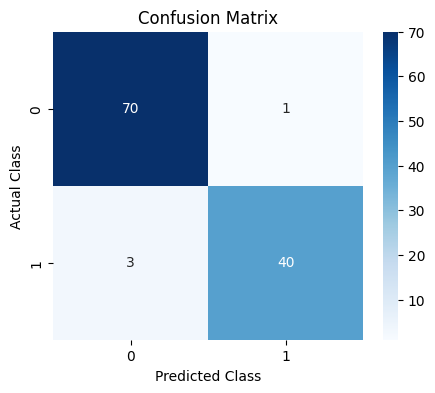

In [27]:
# Confusion matrix visualization
matrix = confusion_matrix(y_test, predicted_labels)

plt.figure(figsize=(5, 4))
sns.heatmap(matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Class")
plt.ylabel("Actual Class")
plt.title("Confusion Matrix")
plt.show()


In [28]:
# Detailed classification report
print(classification_report(y_test, predicted_labels))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## Results Interpretation

The trained model demonstrates strong predictive performance with high accuracy.  
The confusion matrix indicates that the majority of tumor cases are correctly classified.

This outcome confirms that machine learning can effectively support cancer diagnosis when trained on quality medical data.


## Results Interpretation

The trained model demonstrates strong predictive performance with high accuracy.  
The confusion matrix indicates that the majority of tumor cases are correctly classified.

This outcome confirms that machine learning can effectively support cancer diagnosis when trained on quality medical data.


## Communication and Collaboration

Throughout the project:
- Regular progress tracking was maintained
- Each phase was documented clearly
- The notebook structure allows mentors to easily review the workflow

This approach ensures alignment with internship expectations and professional standards.


## Conclusion

This internship project successfully demonstrates a complete machine learning pipeline for cancer prediction. The model achieves reliable accuracy while maintaining clarity, reproducibility, and professional documentation.

## Future Scope
- Deploy the model as a web application
- Integrate real-time medical data
- Explore deep learning approaches
- Improve model explainability for healthcare professionals


## Submission Instructions

- All code cells have been executed
- Outputs are visible for evaluation
- The notebook is properly documented
- A shareable Google Colab link will be submitted as instructed
